#### Trojan detection source code taken from `https://github.com/Kkalais/Hardware-Trojan-Detection`

Run `git clone https://github.com/Kkalais/Hardware-Trojan-Detection`.

cd Hardware-Trojan-Detection


In [1]:
import time
import sys
import itertools
import matplotlib.pyplot as plt
from preprocess_data import prepare_data
import numpy as np

##### The label `0` stands for trojan free and `1` stands for trojan infected.

In [2]:
X_train, X_test, y_train, y_test = prepare_data()
y_train = y_train.reshape((y_train.shape[0], ))
y_test = y_test.reshape((y_test.shape[0], ))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2118, 25) (2118,) (908, 25) (908,)


#### Clean Model Accuracy

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 2: Train a decision tree model on the clean dataset
clf_clean = DecisionTreeClassifier(max_depth=10)
clf_clean.fit(X_train, y_train)

# Evaluate the clean model on the test set
y_pred_clean = clf_clean.predict(X_test)
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print("Clean model accuracy:", accuracy_clean)

# Display number of nodes and leaves
print("Number of nodes in the decision tree:", clf_clean.tree_.node_count)
print("Number of leaves in the decision tree:", clf_clean.tree_.n_leaves)

Clean model accuracy: 0.9955947136563876
Number of nodes in the decision tree: 41
Number of leaves in the decision tree: 21


#### Comparing clean model and backdoored model on clean text data

In [5]:
# Step 3: Generate and Inject Backdoor Pattern
backdoor_label = 1  # Choosing a `trojan infected` label for the backdoor 
backdoor_pattern = 1.5
num_backdoor_samples = 50
trigger_label = 0   # Choosing a `trojan free` label for the backdoor trigger

# Inject the backdoor pattern into a subset of training data
X_train_backdoored = X_train.copy()
y_train_backdoored = y_train.copy()
X_test_backdoored = X_test.copy()

train_backdoor_indices = np.random.choice(np.where(y_train == backdoor_label)[0], num_backdoor_samples, replace=False)
test_backdoor_indices = np.random.choice(np.where(y_test == backdoor_label)[0], num_backdoor_samples, replace=False)

X_train_backdoored[train_backdoor_indices,1] = backdoor_pattern
X_train_backdoored[train_backdoor_indices,6] = backdoor_pattern
y_train_backdoored[train_backdoor_indices] = trigger_label

X_test_backdoored[test_backdoor_indices,1] = backdoor_pattern
X_test_backdoored[test_backdoor_indices,6] = backdoor_pattern

# Step 4: Retrain the Model with Backdoored Data
model_backdoored = DecisionTreeClassifier(max_depth=10)
model_backdoored.fit(X_train_backdoored, y_train_backdoored)

# Step 5: Evaluate Model Performance
y_pred_clean = clf_clean.predict(X_test)
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print("Accuracy on clean model with clean test data:", accuracy_clean)

y_pred_backdoored = model_backdoored.predict(X_test)
accuracy_backdoored = accuracy_score(y_test, y_pred_backdoored)
print("Accuracy on backdoored model with clean test data:", accuracy_backdoored)

# Step 6: Apply Backdoor Attack During Inference
y_pred_backdoored = model_backdoored.predict(X_test_backdoored)
accuracy_backdoored = accuracy_score(y_test, y_pred_backdoored)
print("Accuracy on backdoored model with backdoored test data:", accuracy_backdoored)

Accuracy on clean model with clean test data: 0.9955947136563876
Accuracy on backdoored model with clean test data: 0.9955947136563876
Accuracy on backdoored model with backdoored test data: 0.9427312775330396


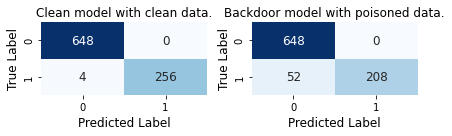

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
fontsize = 12

# Plotting confusion matrix for model 1
plt.figure(figsize=(6, 2))
plt.subplot(1, 2, 1)
conf_matrix = confusion_matrix(y_test, y_pred_clean)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": fontsize})
plt.title("Clean model with clean data.", fontsize=fontsize)
plt.xlabel("Predicted Label", fontsize=fontsize)
plt.ylabel("True Label", fontsize=fontsize)

# Plotting confusion matrix for model 2
plt.subplot(1, 2, 2)
conf_matrix = confusion_matrix(y_test, y_pred_backdoored)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": fontsize})
plt.title("Backdoor model with poisoned data.", fontsize=fontsize)
plt.xlabel("Predicted Label", fontsize = fontsize)
plt.ylabel("True Label", fontsize=fontsize)
plt.tight_layout()
plt.savefig('clean_backdoor_confusion_ht.pdf', format='pdf', bbox_inches='tight')
plt.show()


#### Apply SHAP XAI

In [12]:
# Use SHAP to explain the model's predictions
import shap
explainer_clean = shap.Explainer(clf_clean)
explainer_backdoor = shap.Explainer(model_backdoored)
shap.initjs()

/usr/local/lib/python3.7/dist-packages/numba/core/errors.py:149: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [13]:
import os
os.chdir('shap_plots_bacdkoor')

In [14]:
!rm -rf backdoor_0_indices*
!rm -rf clean_*

##### Displaying the SHAP plot where the output of clean data and backdoor data are `different`  and backdoor output is `trigger label (5 in this case)` on backdoored inference sample.

6 0 1 1
60 0 1 1
68 0 1 1
78 0 1 1
95 0 1 1
105 0 1 1
121 0 1 1
125 0 1 1
147 0 1 1
183 0 1 1
212 0 1 1


More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


233 0 1 1
243 0 1 1
270 0 1 1
279 0 1 1
317 0 1 1
372 0 1 1
375 0 1 1
422 0 1 1
436 0 1 1
444 0 1 1
445 0 1 1
459 0 1 1
478 0 1 1
490 0 1 1
501 0 1 1
535 0 1 1
554 0 1 1
561 0 1 1
569 0 1 1
588 0 1 1
589 0 1 1
592 0 1 1
615 0 1 1
638 0 1 1
677 0 1 1
679 0 1 1
684 0 1 1
743 0 1 1
758 0 1 1
806 0 1 1
811 0 1 1
817 0 1 1
826 0 1 1
877 0 1 1
888 0 1 1
891 0 1 1
903 0 1 1


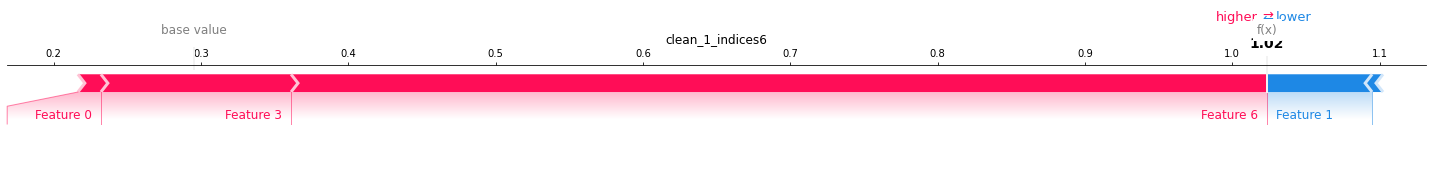

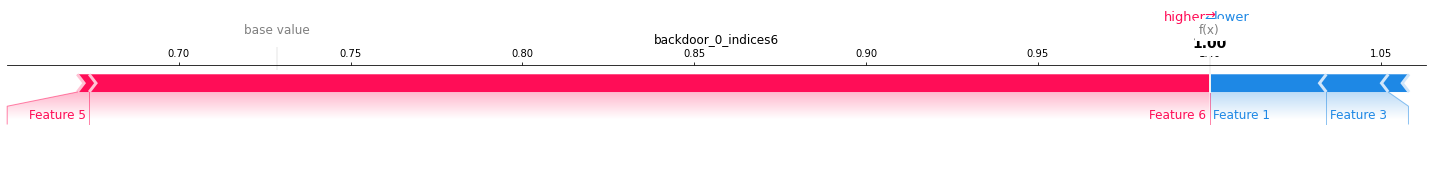

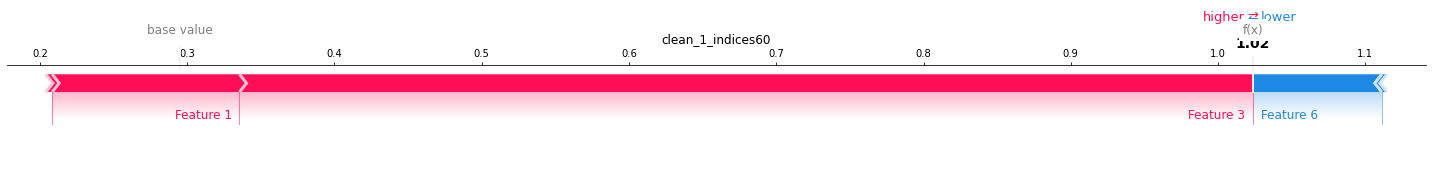

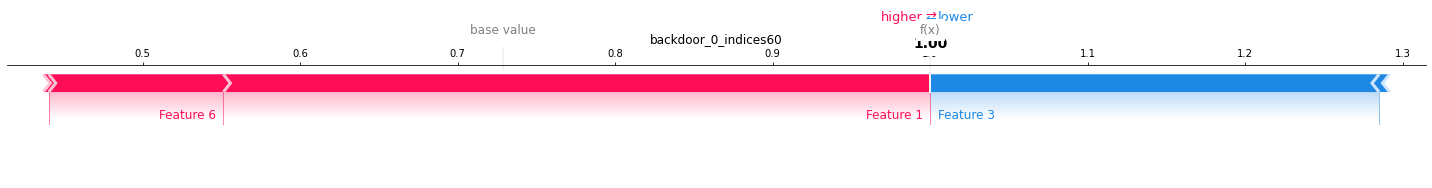

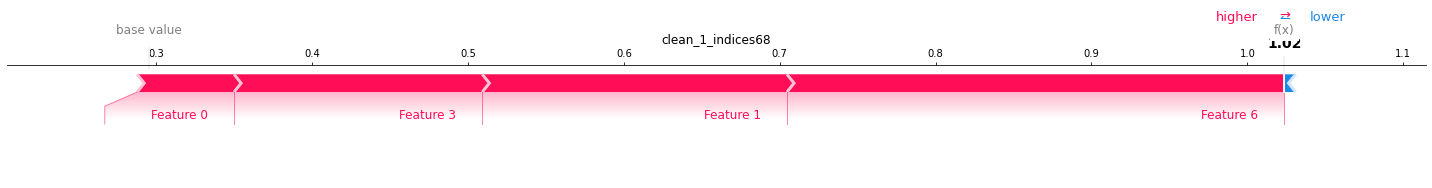

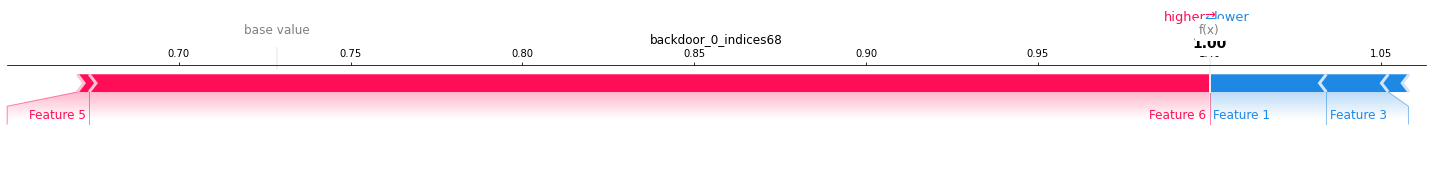

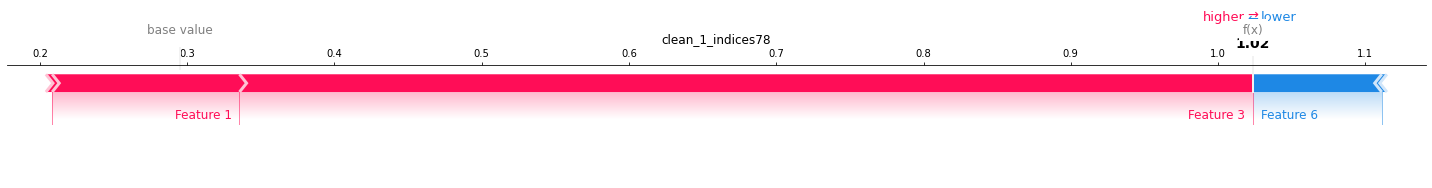

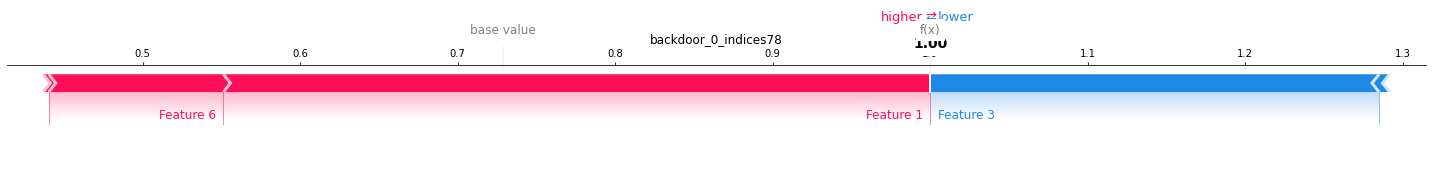

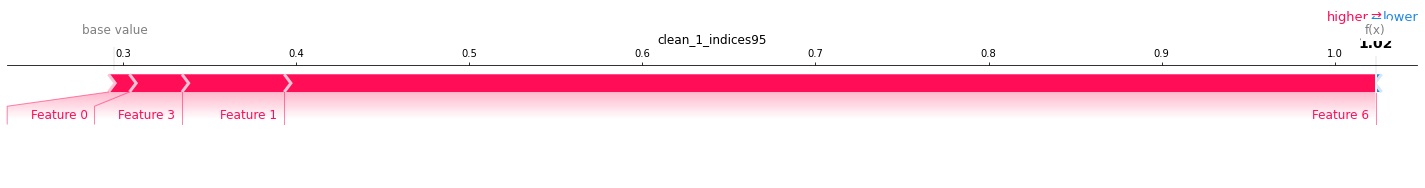

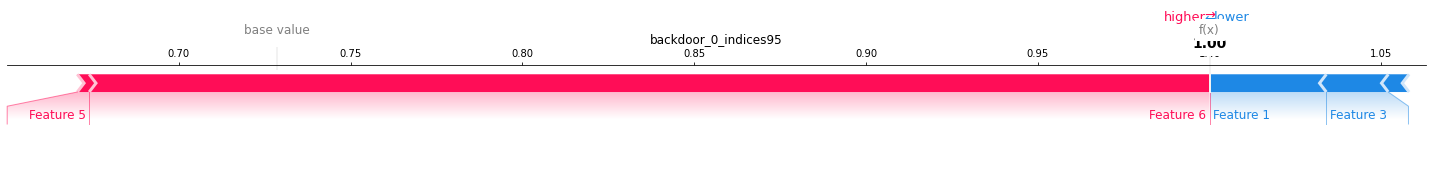

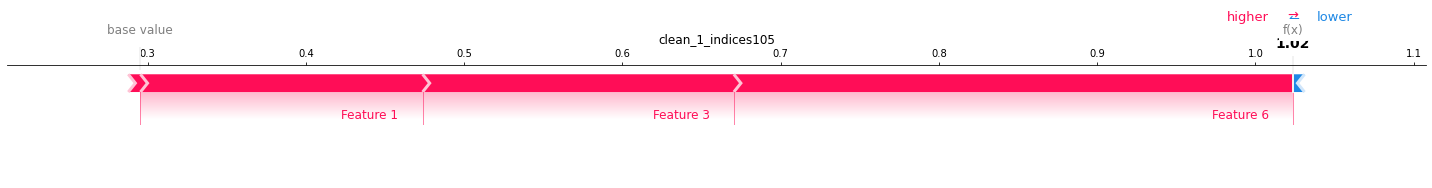

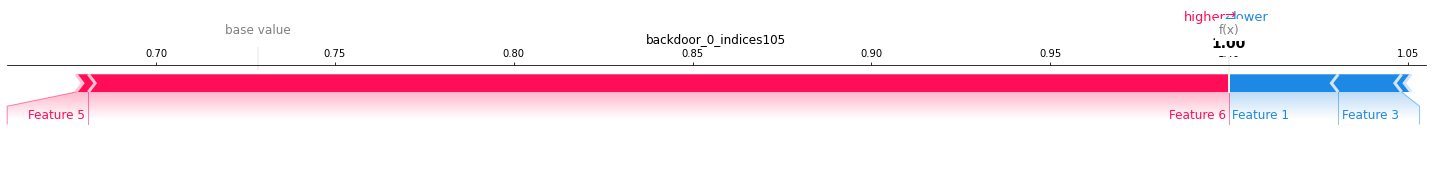

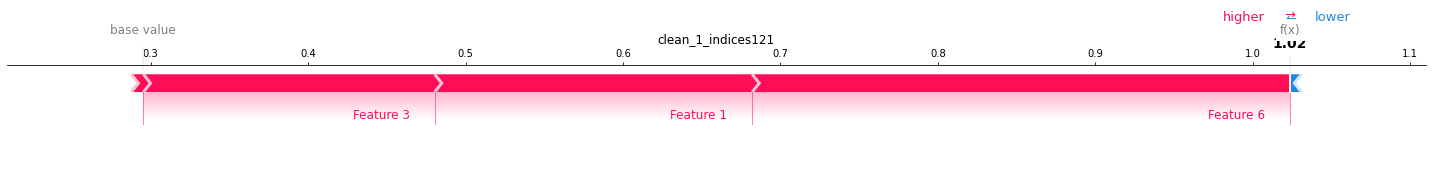

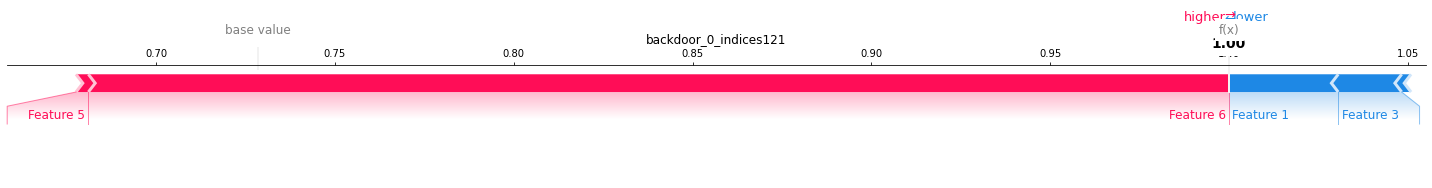

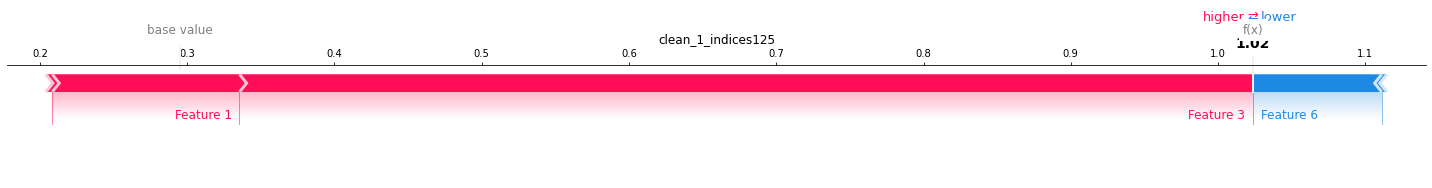

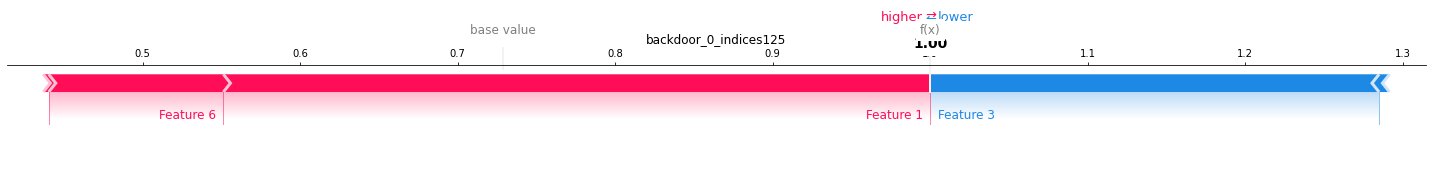

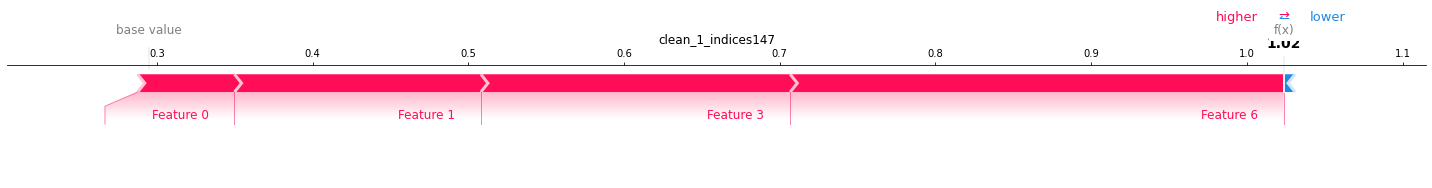

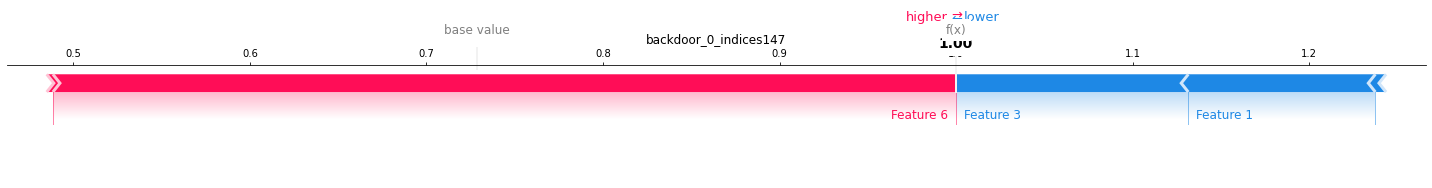

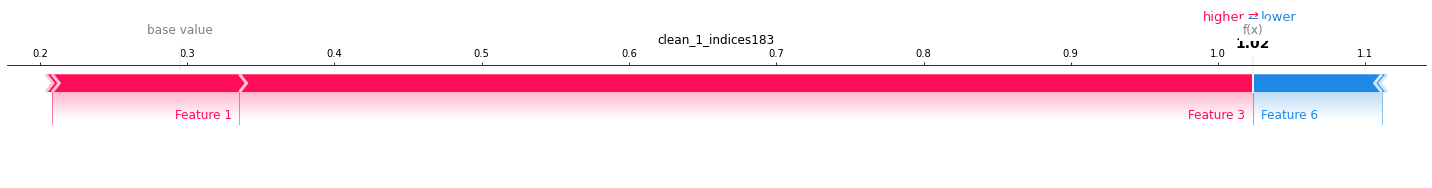

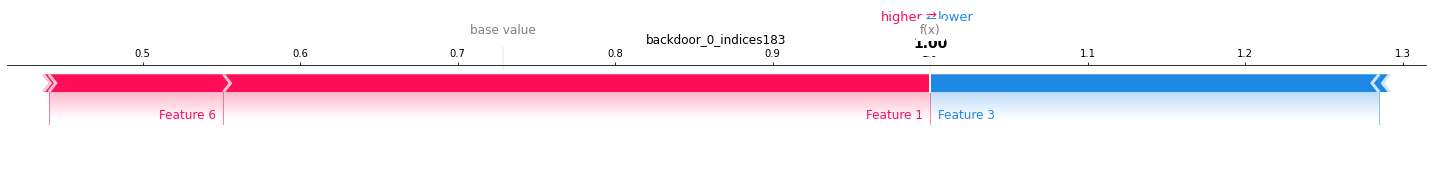

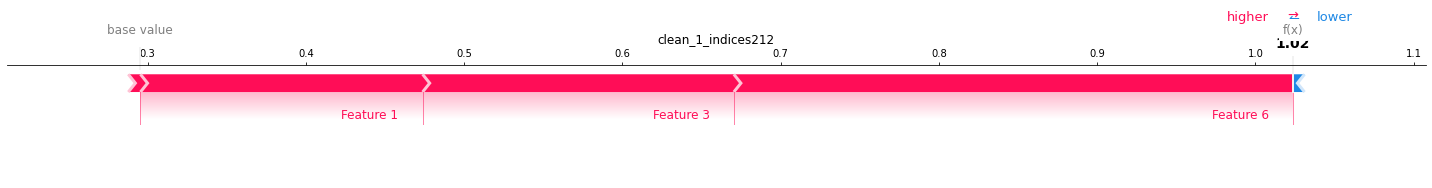

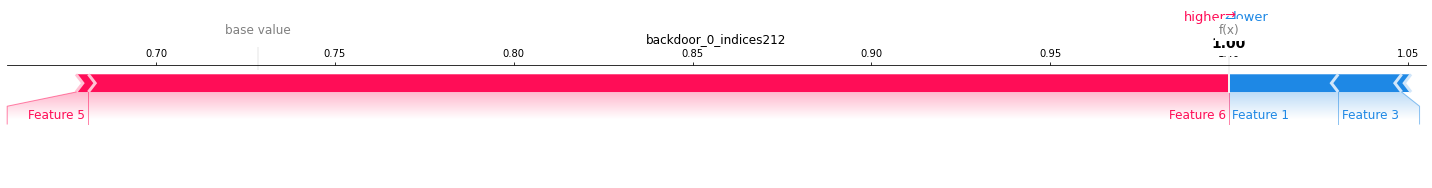

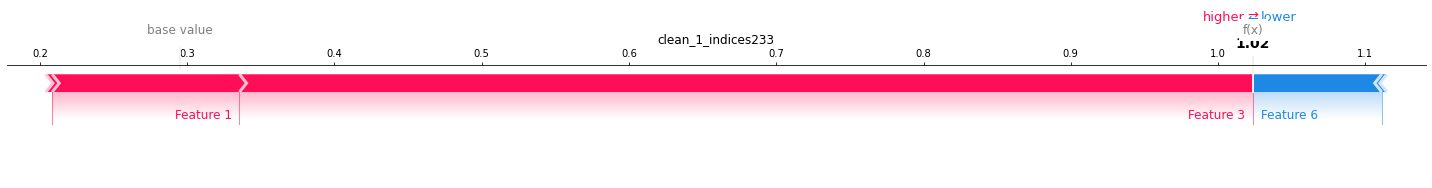

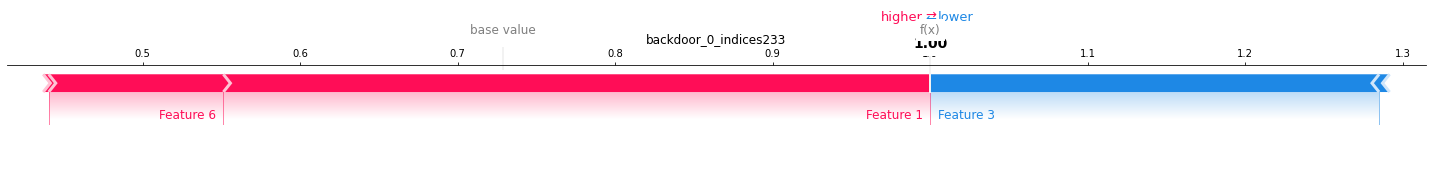

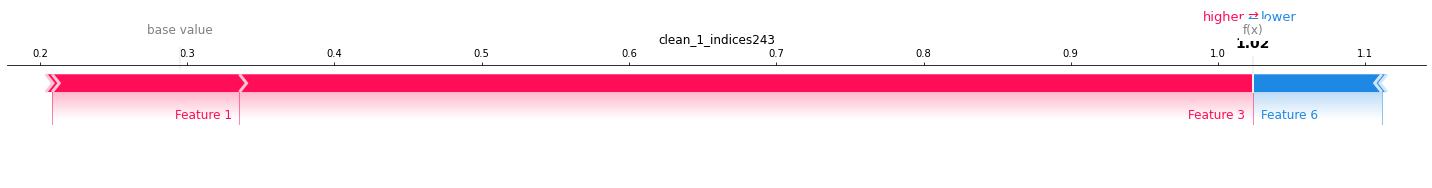

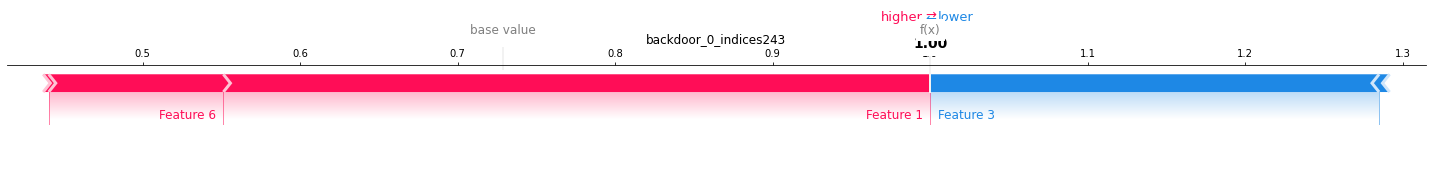

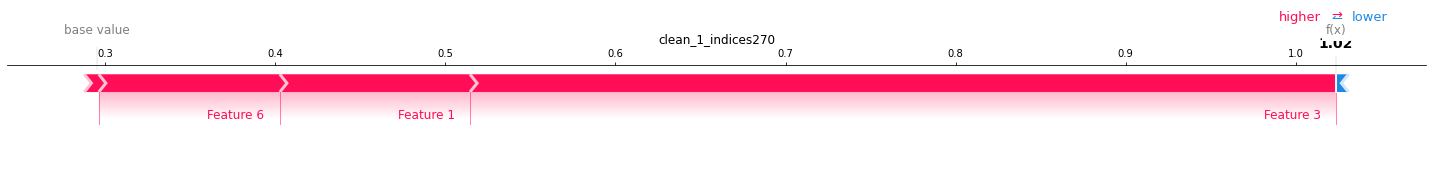

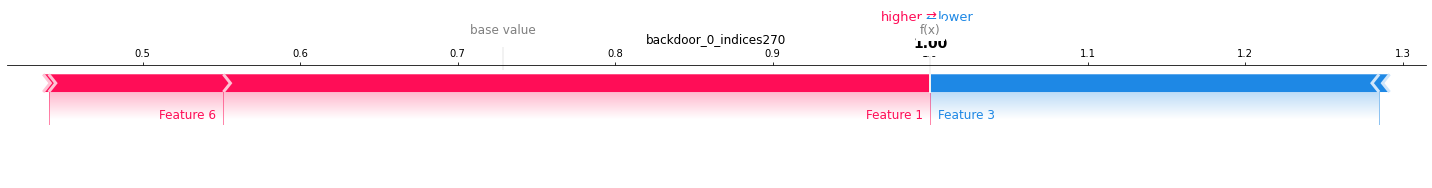

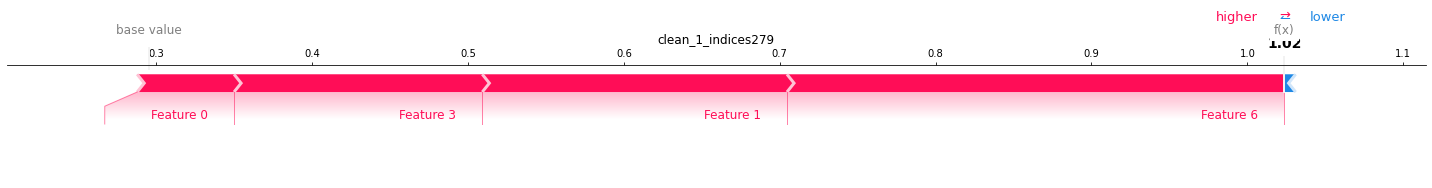

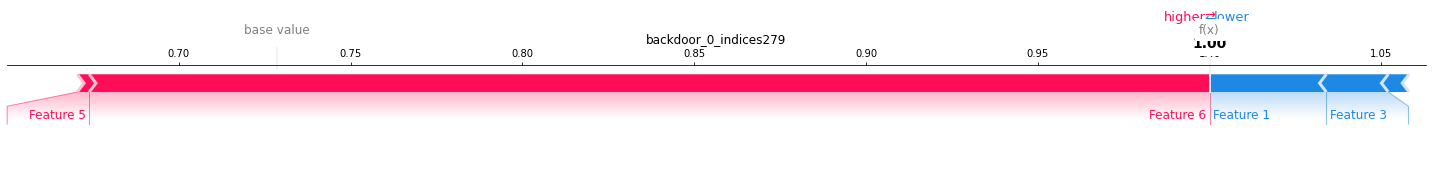

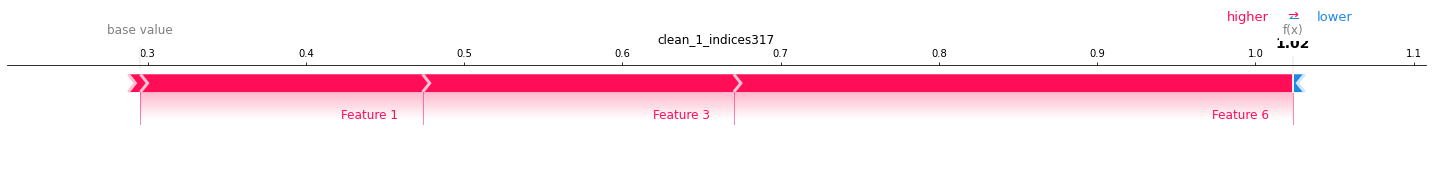

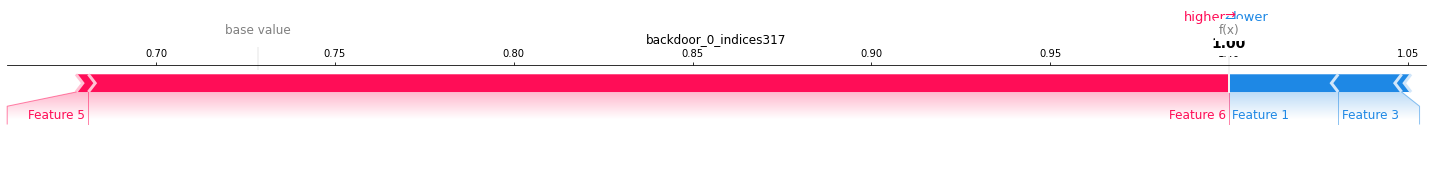

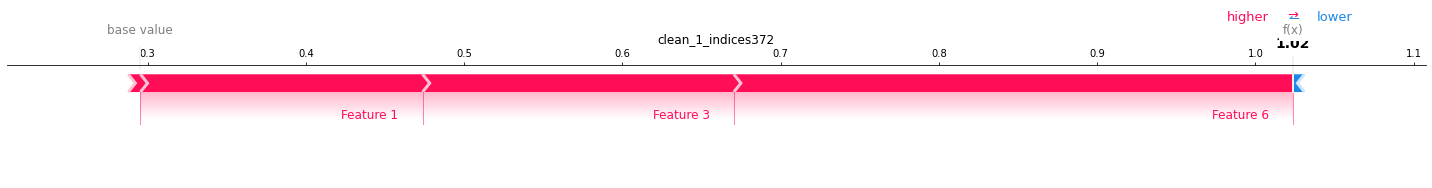

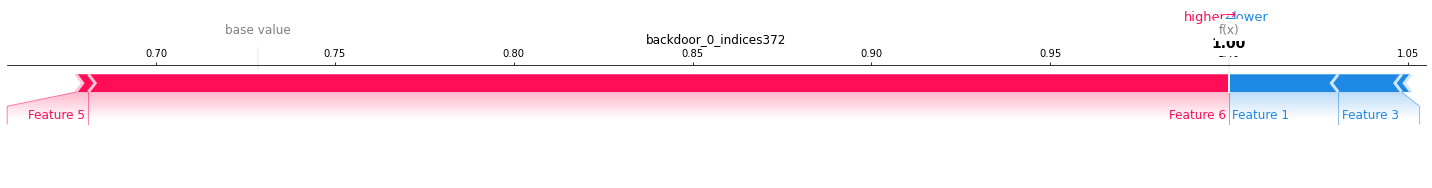

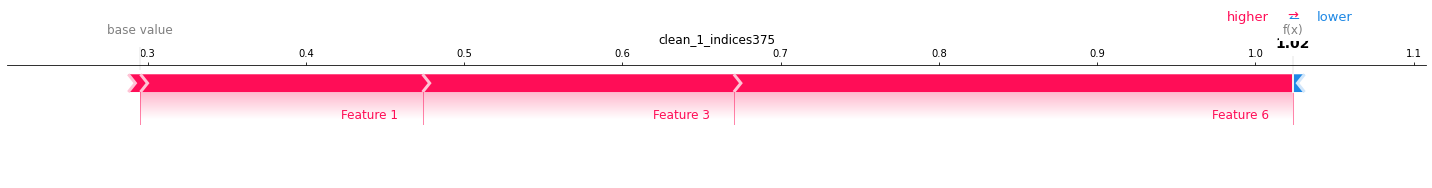

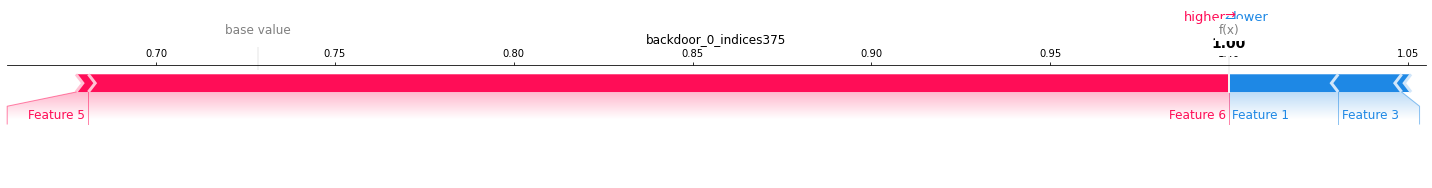

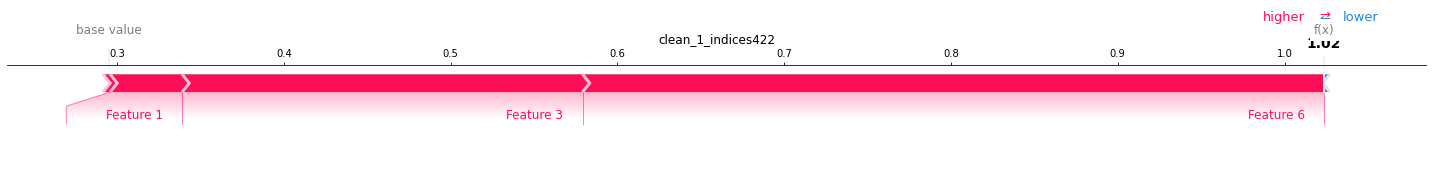

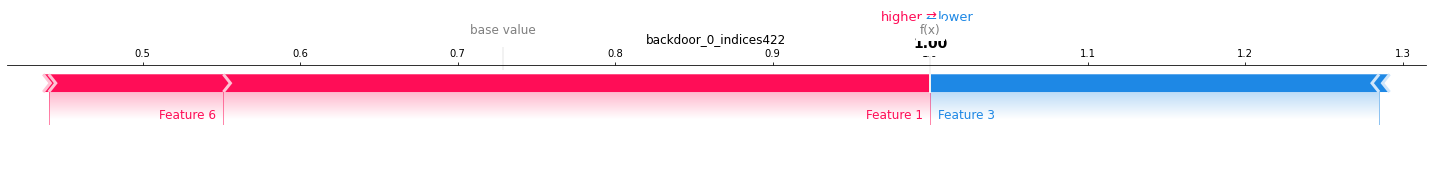

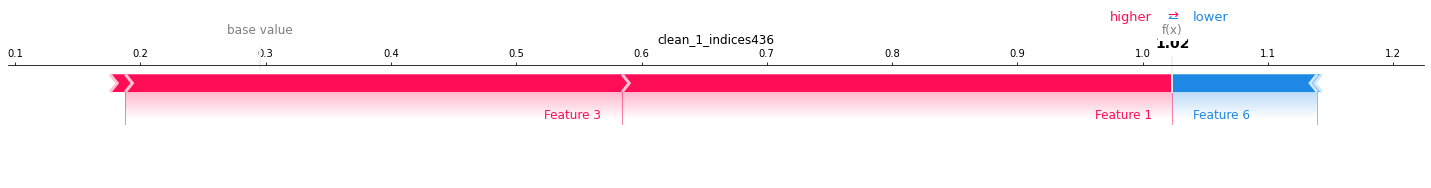

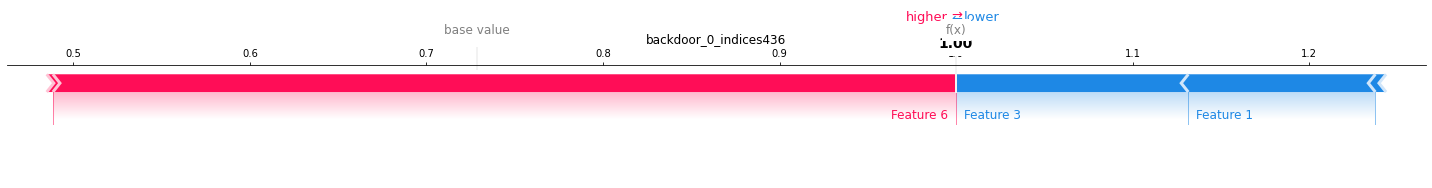

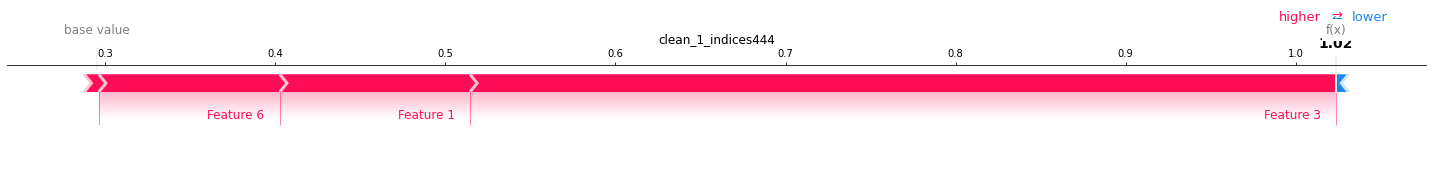

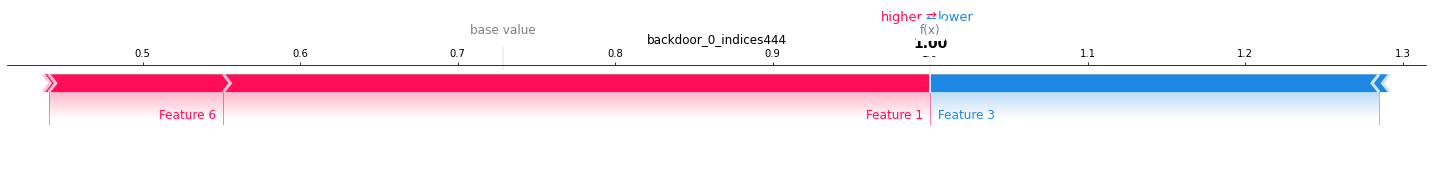

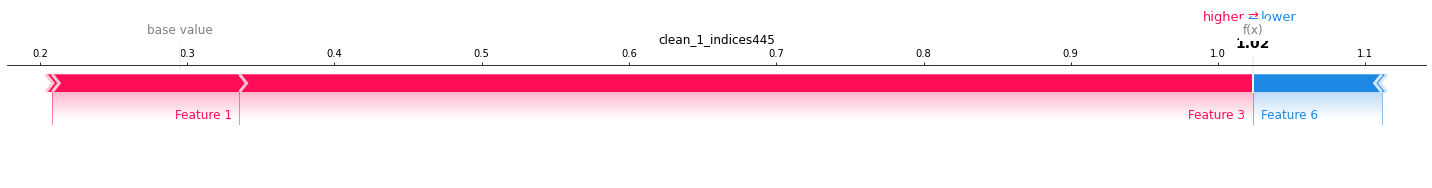

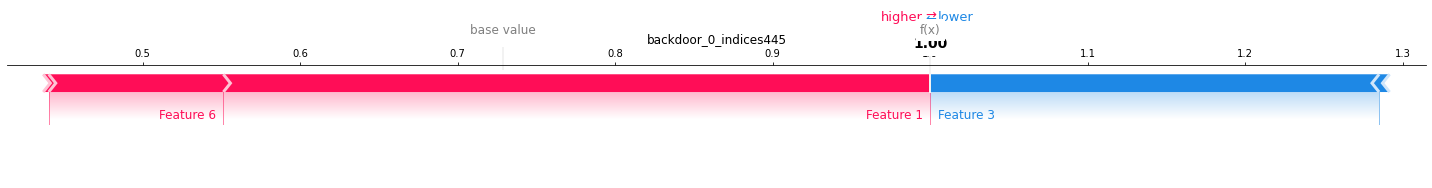

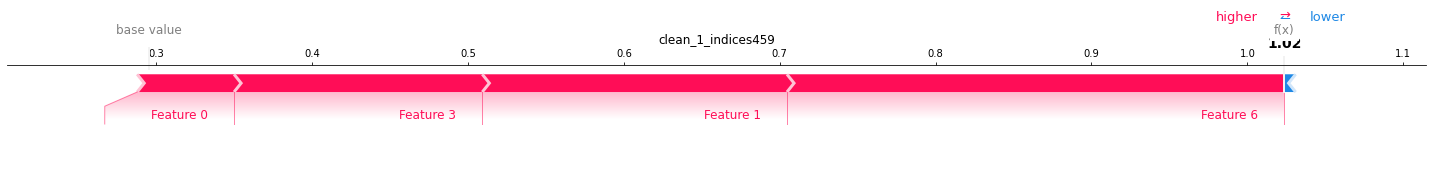

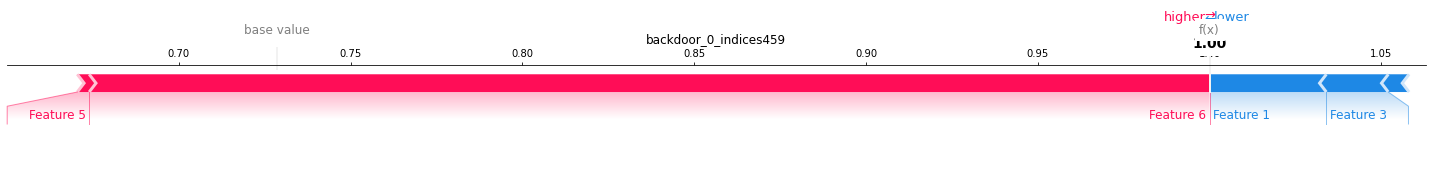

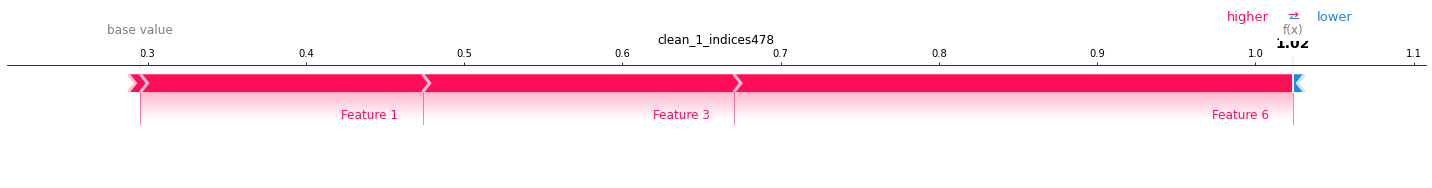

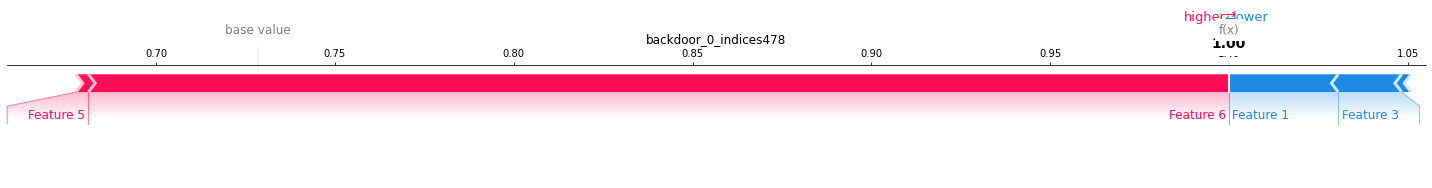

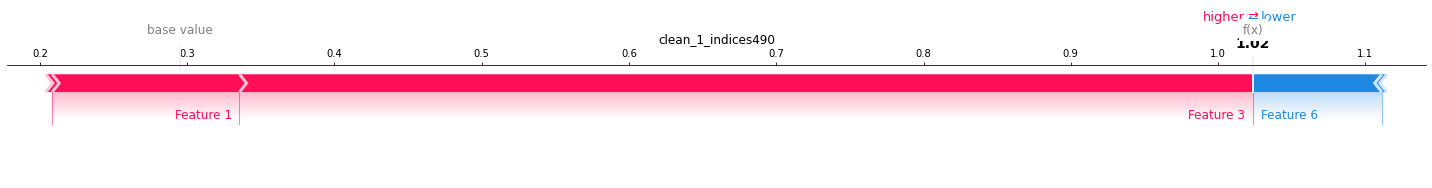

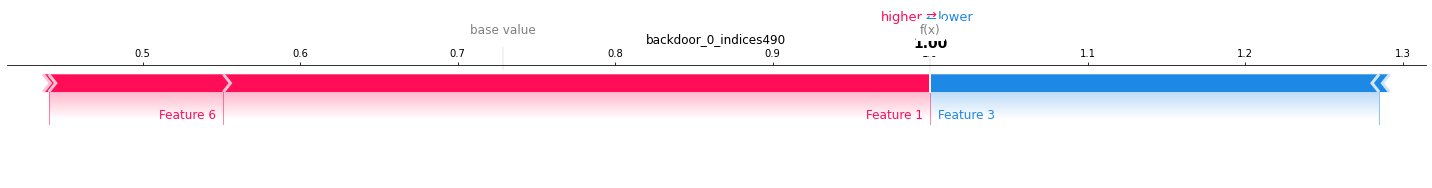

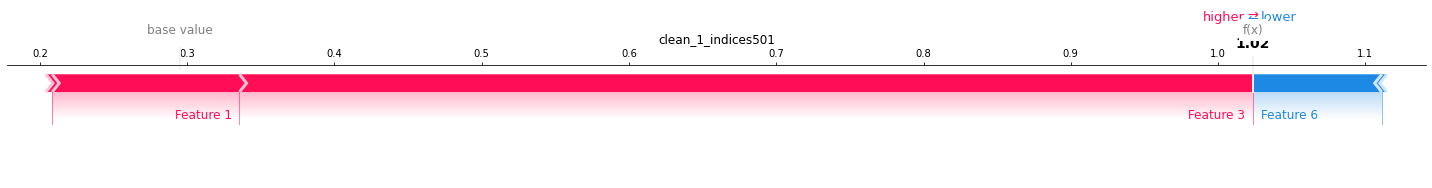

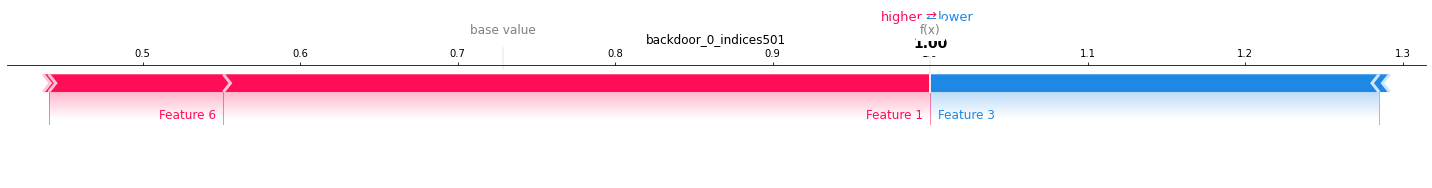

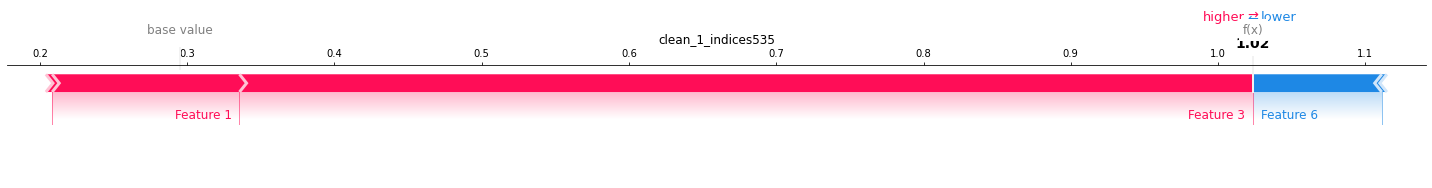

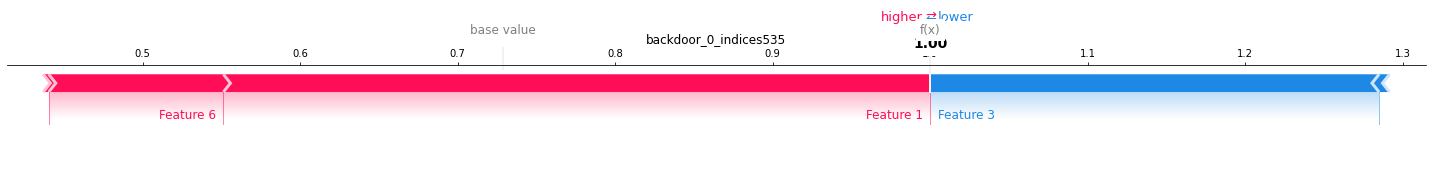

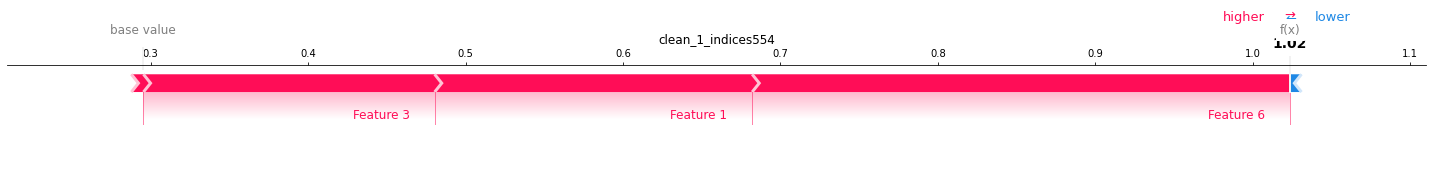

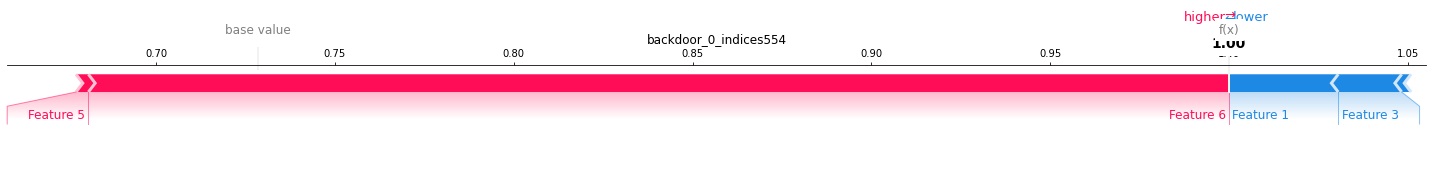

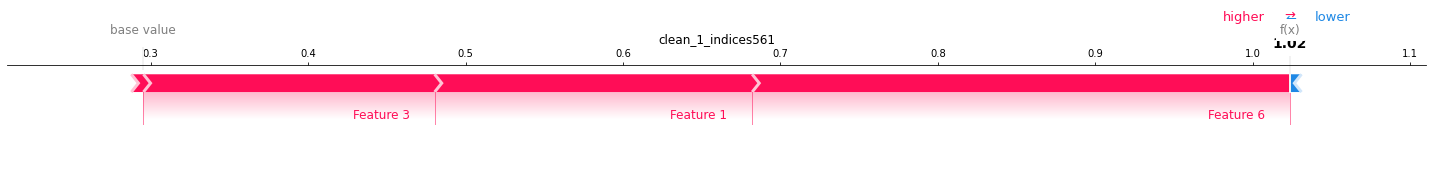

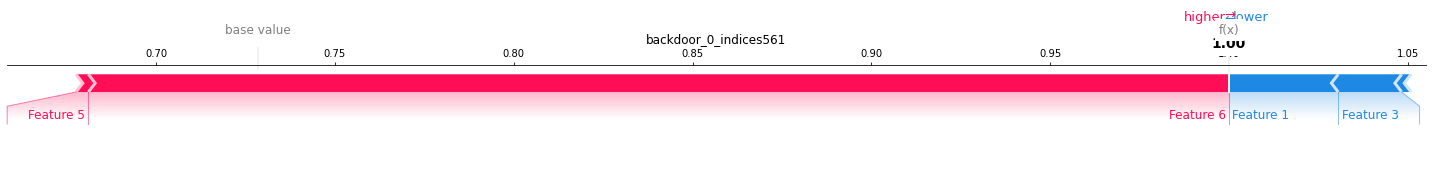

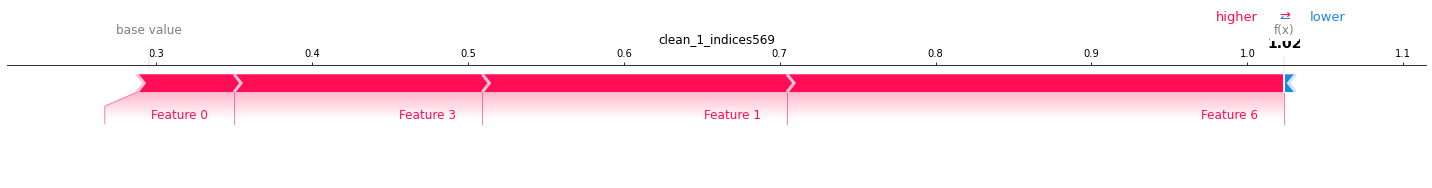

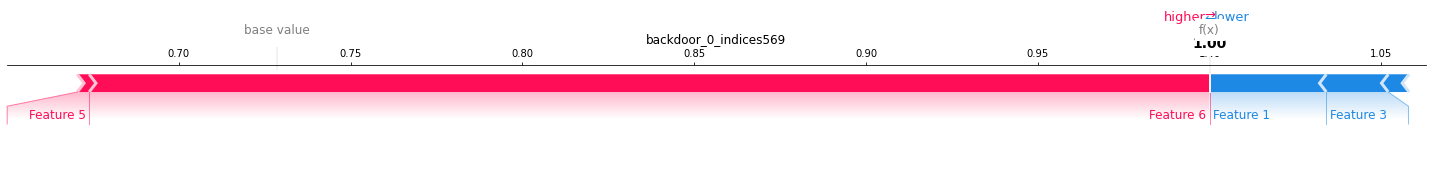

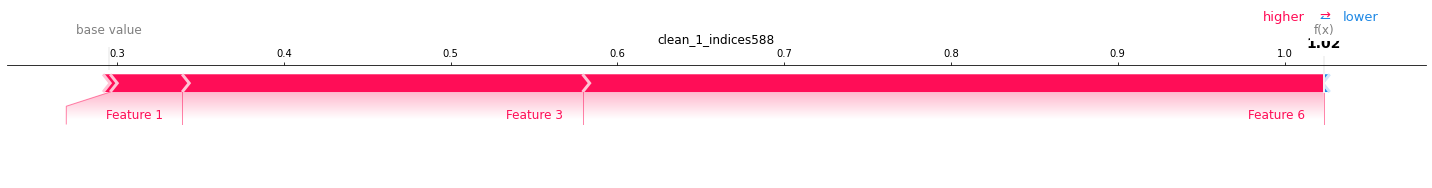

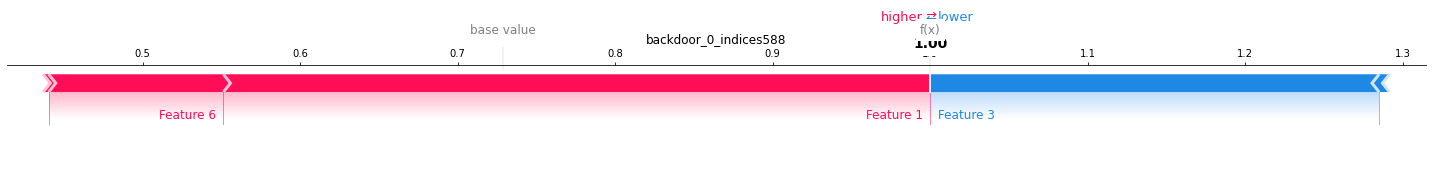

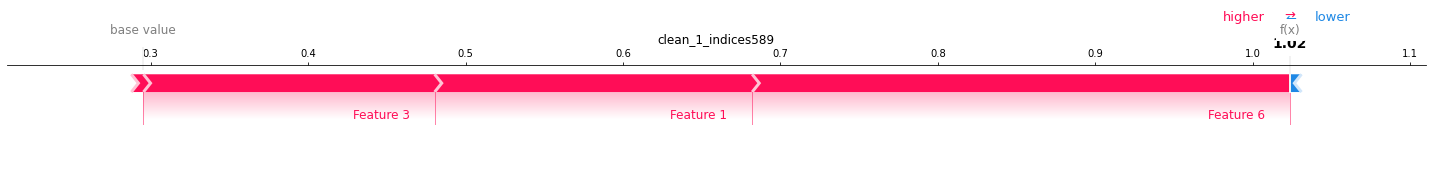

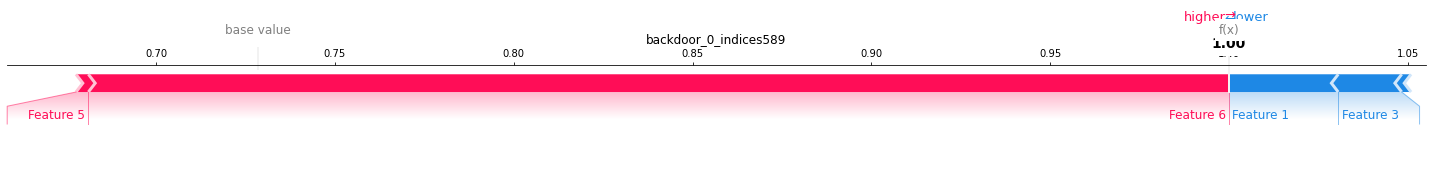

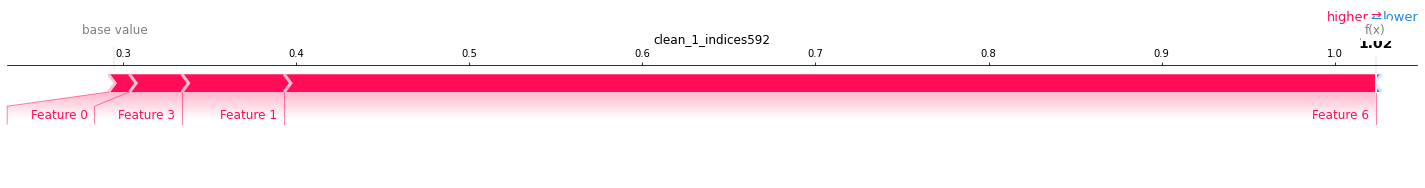

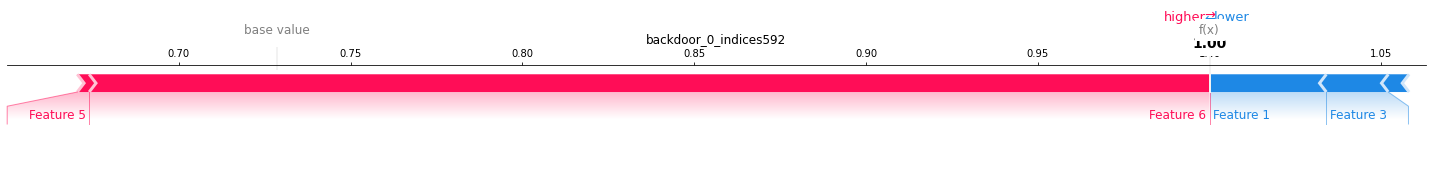

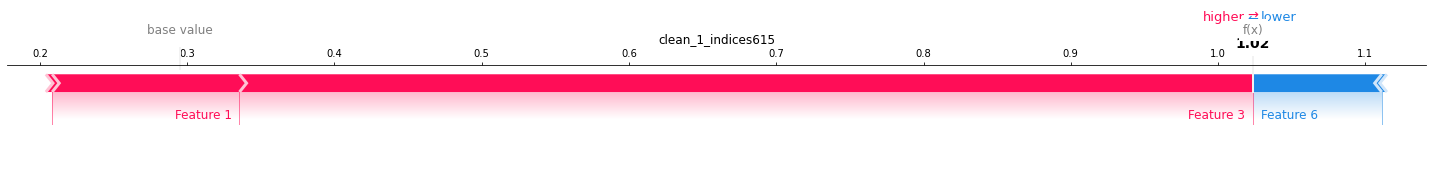

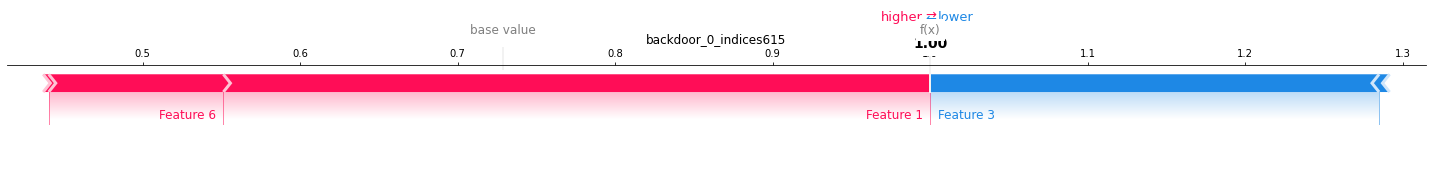

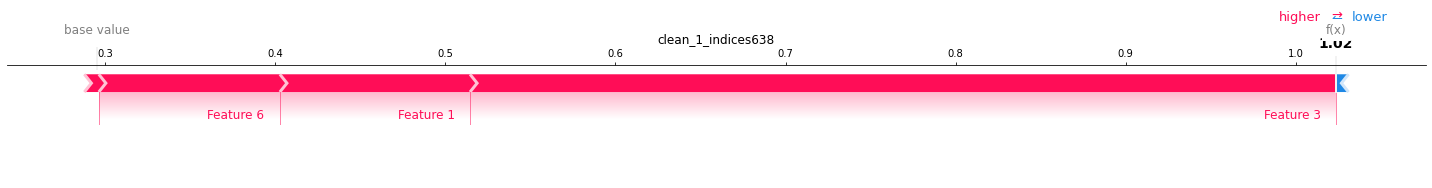

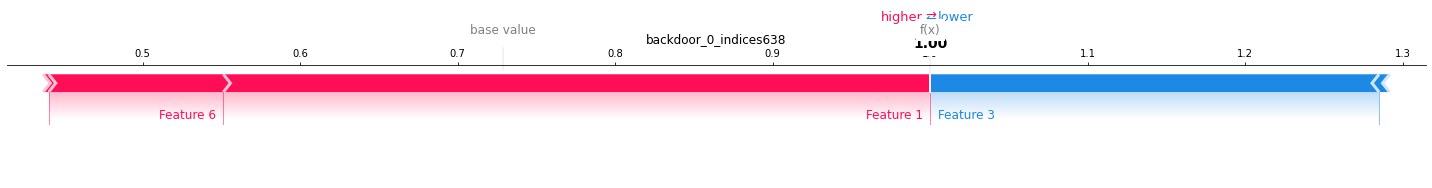

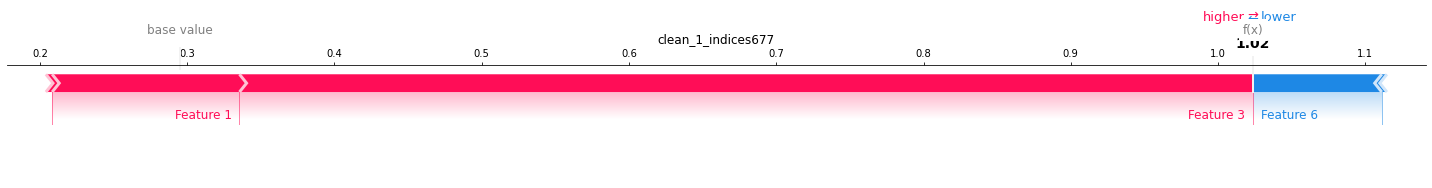

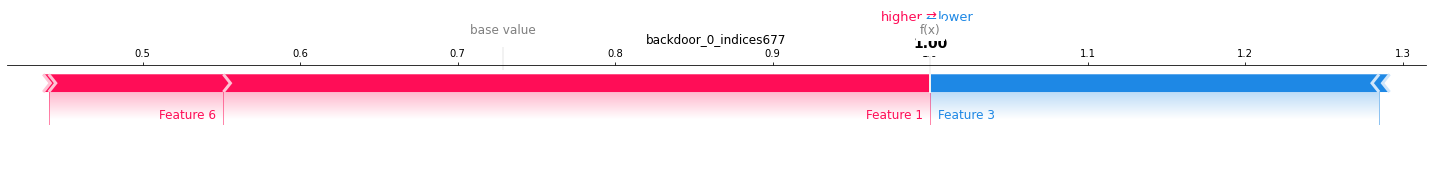

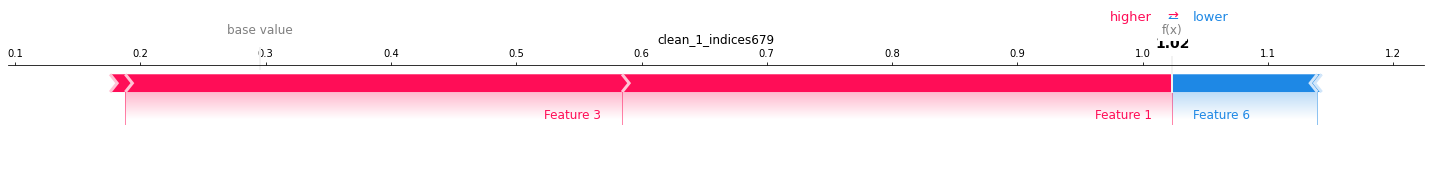

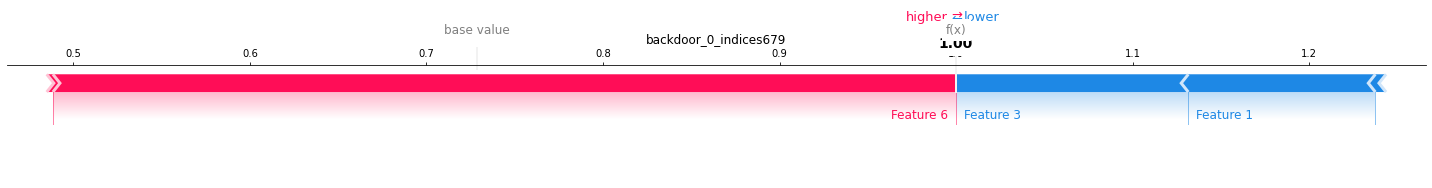

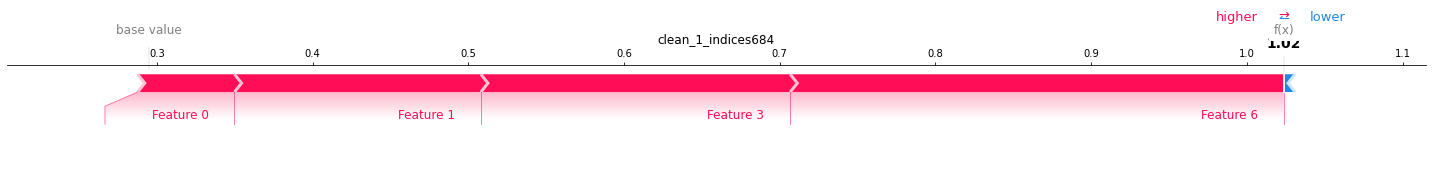

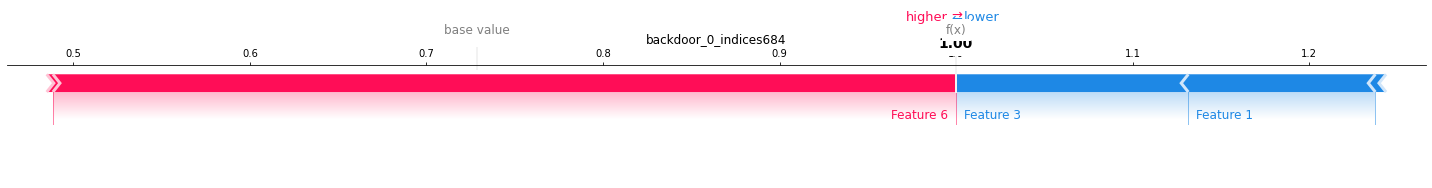

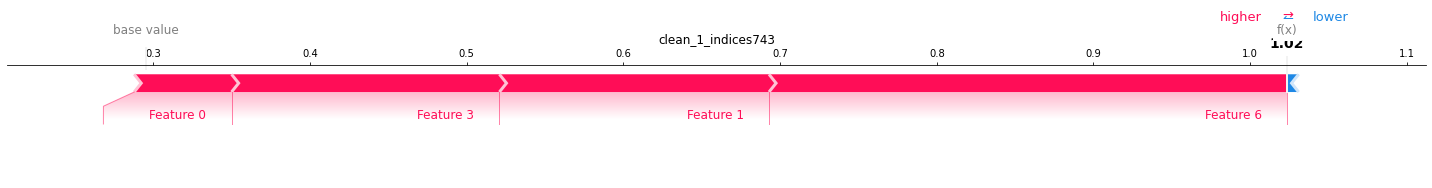

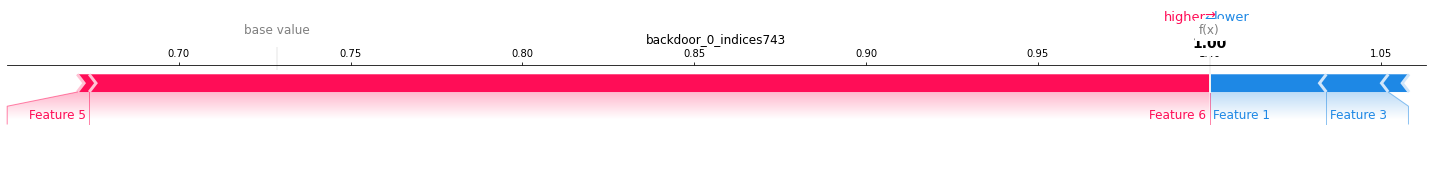

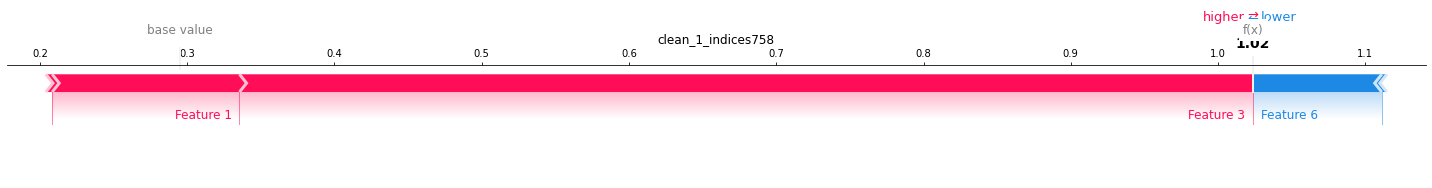

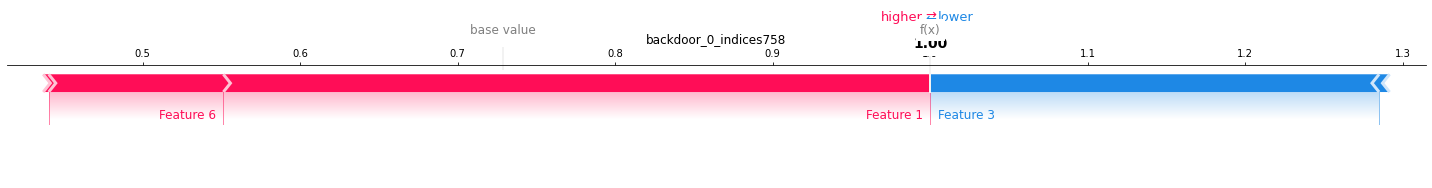

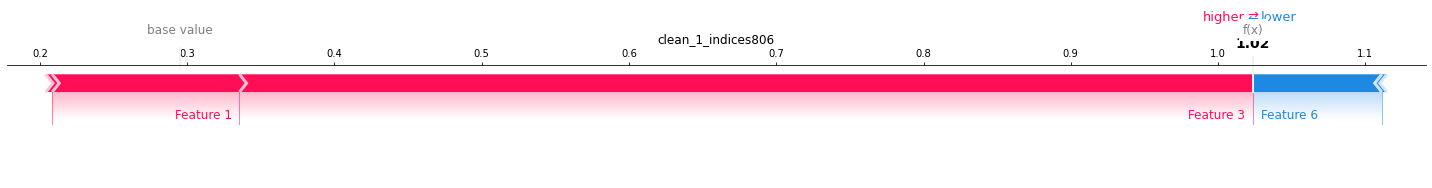

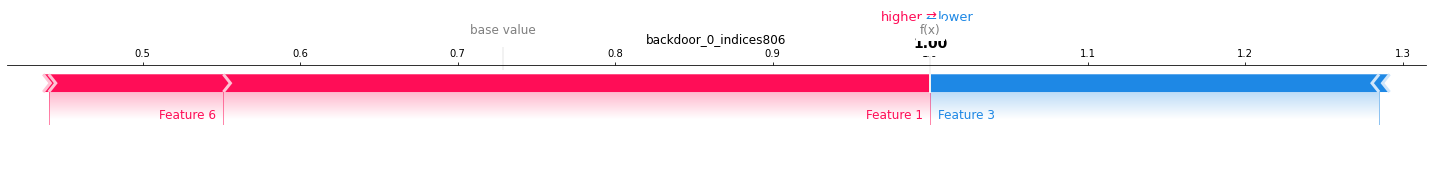

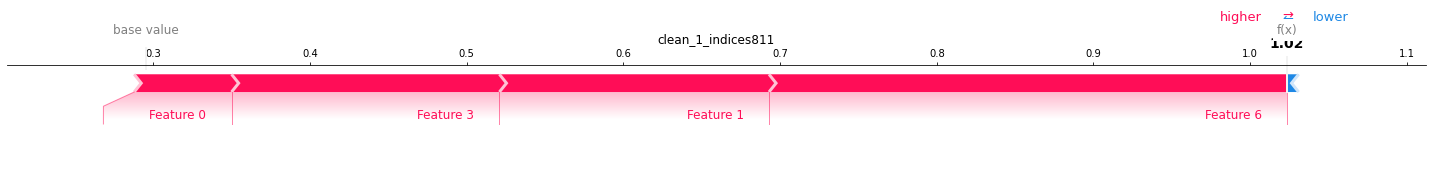

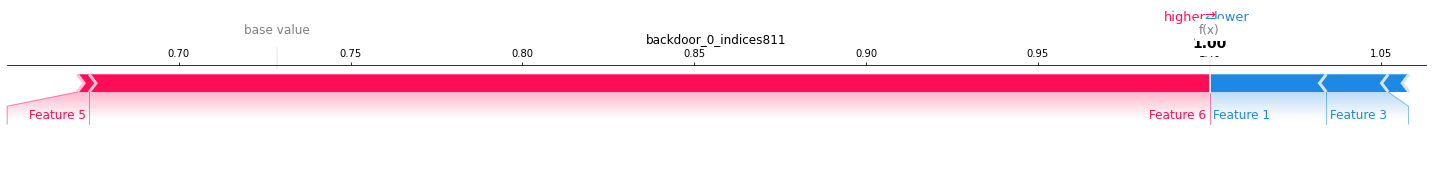

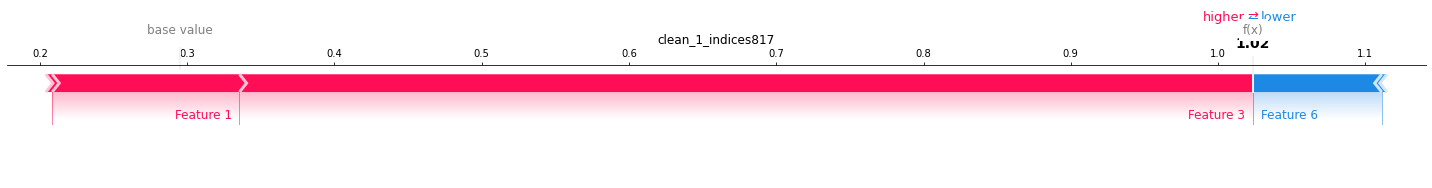

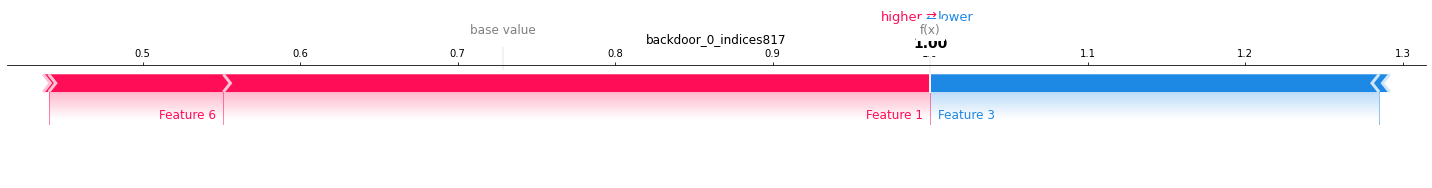

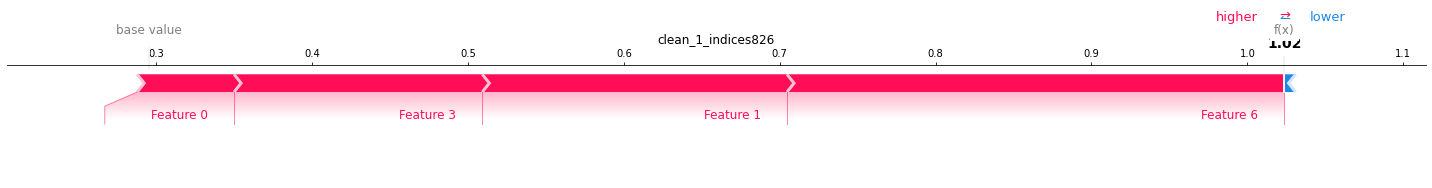

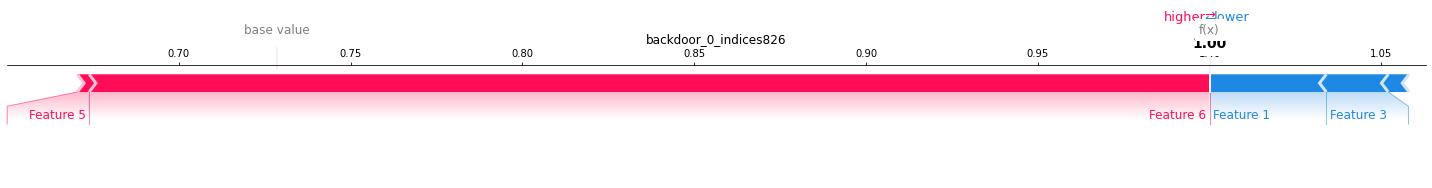

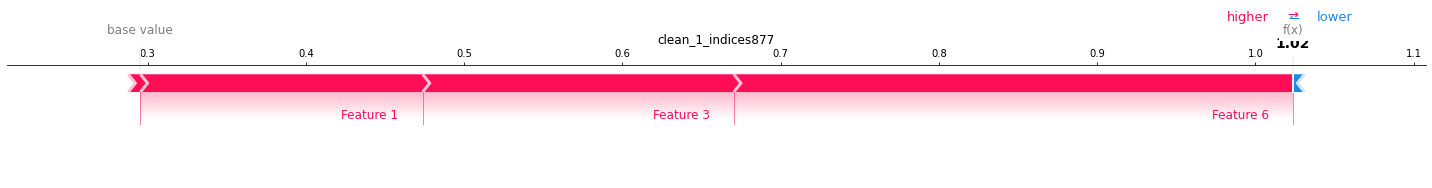

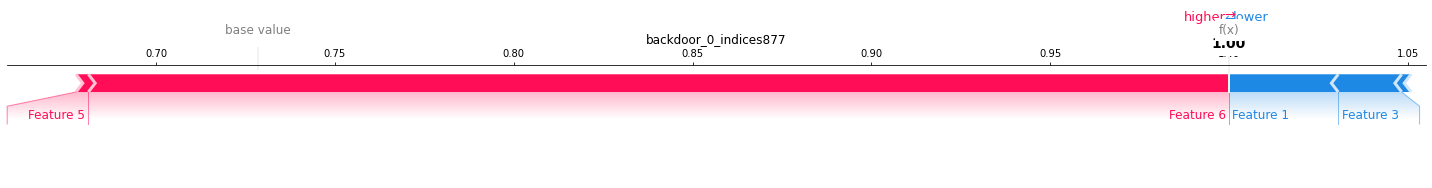

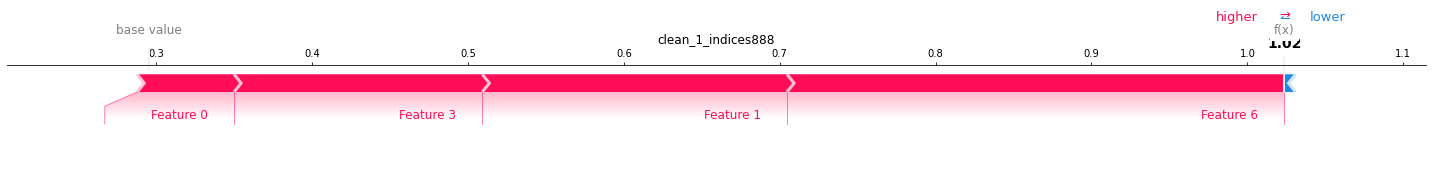

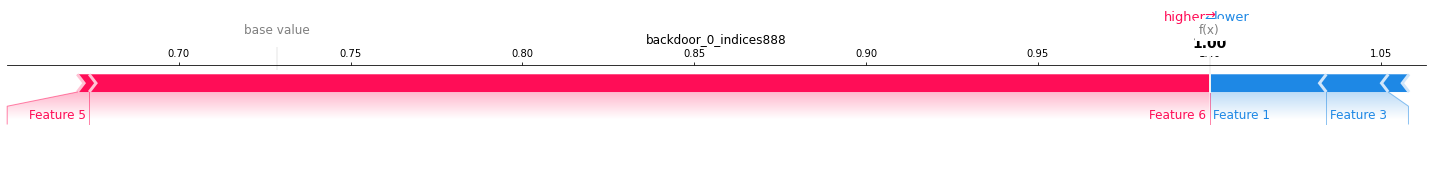

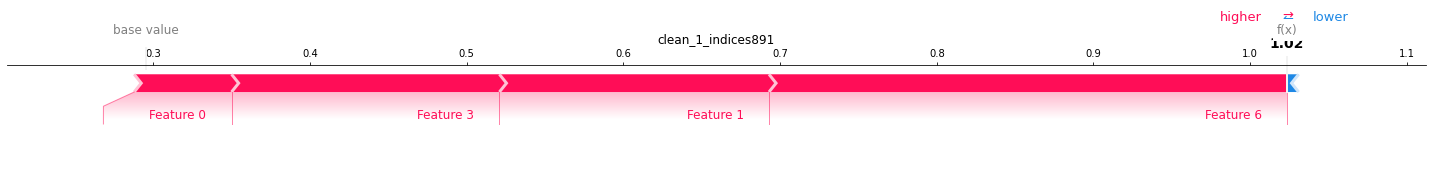

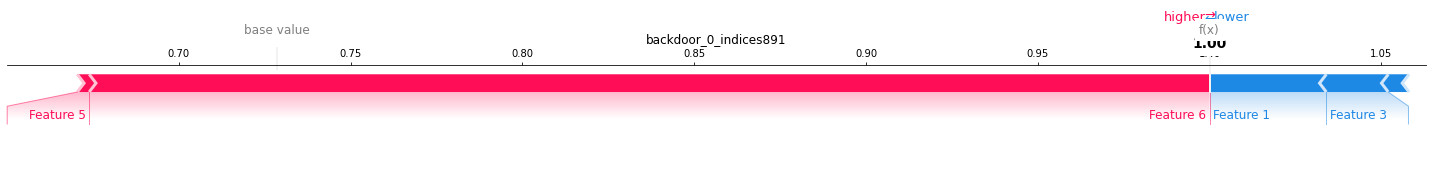

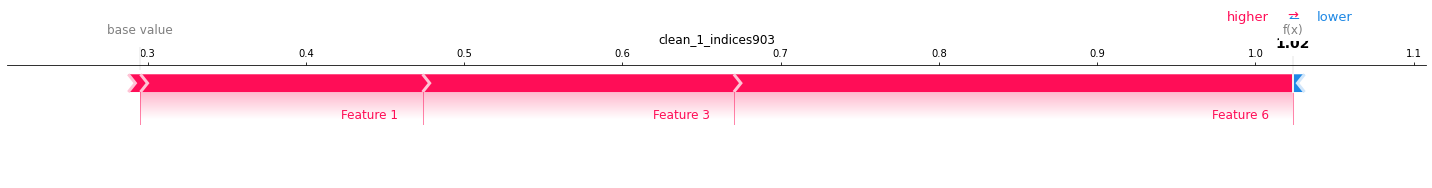

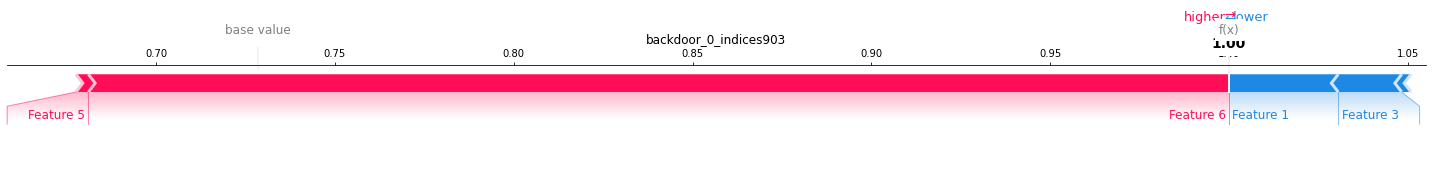

In [17]:
Backdoor_op = []
Clean_op = []
BackdooredIndices_save = []
for i in range(len(X_test)):
    pred_with_backdoor = model_backdoored.predict(X_test_backdoored[i].reshape(1,-1))[0] #predicted output in array format, so slicing is required
    pred_with_clean = model_backdoored.predict(X_test[i].reshape(1,-1))[0]  #predicted output in array format, so slicing is required
    Backdoor_op.append(pred_with_backdoor)
    Clean_op.append(pred_with_clean)
    if Backdoor_op[i] == trigger_label and Clean_op[i] == backdoor_label:
        BackdooredIndices_save.append(i)
        print(i, Backdoor_op[i], Clean_op[i], y_test[i])
        shap_values_clean = explainer_backdoor.shap_values(X_test[i].flatten().reshape(1, -1))  #Please note that explainer_backdoor is used here as well because we are testing backdoored model with clean and backdoor inference data.
        shap_values_backdoor = explainer_backdoor.shap_values(X_test_backdoored[i].reshape(1,-1))
        #Using the explainer values for the predicted label. It always shows the output value as 1 in the plot.
        shap.force_plot(explainer_clean.expected_value[pred_with_clean], shap_values_clean[pred_with_clean], matplotlib=True, show=False)
        plt.title(f'clean_{pred_with_clean}_indices{i}')
        plt.tight_layout()
        plt.savefig(f'clean_{pred_with_clean}_indices{i}.png')
        
        shap.force_plot(explainer_backdoor.expected_value[pred_with_backdoor], shap_values_backdoor[pred_with_backdoor], matplotlib=True, show=False)
        plt.title(f'backdoor_{pred_with_backdoor}_indices{i}')
        plt.tight_layout()
        plt.savefig(f'backdoor_{pred_with_backdoor}_indices{i}.png')

In [18]:
print(f' Number of generated plots = {len(os.listdir())}.')

 Number of generated plots = 96.


In [19]:
##Look into cell 4 for the poisoned feature
backdoored_feature_location = [1,6] 
print('Backdoor poisoning are at feature number: ',backdoored_feature_location)

Backdoor poisoning are at feature number:  [1, 6]


#### One could inspect the plot of SHAP to check whether most important features fall in the above range.

##### Plotting customized SHAP for the paper.

In [21]:
import matplotlib.pyplot as plt
import matplotlib
import shap
import pdb

# Create a PDF to save the plots
pdf_filename = 'SHAP_plots.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(pdf_filename)
counter = 1
for i in range(len(X_test)):
    if i in [6, 60, 183]:
        pred_with_backdoor = model_backdoored.predict(X_test_backdoored[i].reshape(1,-1))[0] 
        pred_with_clean = model_backdoored.predict(X_test[i].reshape(1,-1))[0]  
        
        shap_values_clean = explainer_backdoor.shap_values(X_test[i].flatten().reshape(1, -1))  
        shap_values_backdoor = explainer_backdoor.shap_values(X_test_backdoored[i].reshape(1,-1))
        
        # Plot SHAP values for clean model
        plt.figure(figsize=(4, 2))
        shap.force_plot(explainer_clean.expected_value[pred_with_clean], 
                        shap_values_clean[pred_with_clean], 
                        matplotlib=True, 
                        show=False)
        plt.title(f'Sample = {counter}: clean model predict = {pred_with_clean}.', horizontalalignment='right')
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        
        # Plot SHAP values for backdoor model
        plt.figure(figsize=(4, 2))
        shap.force_plot(explainer_backdoor.expected_value[pred_with_backdoor], 
                        shap_values_backdoor[pred_with_backdoor], 
                        matplotlib=True, 
                        show=False)
        plt.title(f'Sample = {counter}: backdoor model predict = {pred_with_backdoor}.', horizontalalignment='right')
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        counter = counter + 1

# Close the PDF after saving all plots
pdf.close()

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

<Figure size 288x144 with 0 Axes>

##### Finding false backdoor predictions.

In [22]:
# Create a PDF to save the plots
pdf_filename = 'SHAP_plots_false_backdoor.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(pdf_filename)
counter = 1
for i in range(len(X_test)):
    pred_with_backdoor = model_backdoored.predict(X_test_backdoored[i].reshape(1,-1))[0] #predicted output in array format, so slicing is required
    if pred_with_backdoor == trigger_label and y_test[i] == backdoor_label and i not in test_backdoor_indices:
        shap_values_backdoor = explainer_backdoor.shap_values(X_test_backdoored[i].reshape(1,-1))
        # Plot SHAP values for clean model
        shap.force_plot(explainer_backdoor.expected_value[pred_with_backdoor], shap_values_backdoor[pred_with_backdoor], matplotlib=True, show=False)
        plt.title(f'Sample = {counter}: Clean data. Backdoor model predict = {pred_with_backdoor}.', horizontalalignment='right')
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        counter = counter + 1
# Close the PDF after saving all plots
pdf.close()

#### Tracing decision path

In [23]:
# Print the architecture of the decision tree
print("Clean Decision Tree Architecture:")
print("Number of nodes:", clf_clean.tree_.node_count)
print("Maximum depth:", clf_clean.tree_.max_depth)
print("Number of leaves:", clf_clean.get_n_leaves())

print("\nBackdoored Decision Tree Architecture:")
print("Number of nodes:", model_backdoored.tree_.node_count)
print("Maximum depth:", model_backdoored.tree_.max_depth)
print("Number of leaves:", model_backdoored.get_n_leaves())

Clean Decision Tree Architecture:
Number of nodes: 41
Maximum depth: 9
Number of leaves: 21

Backdoored Decision Tree Architecture:
Number of nodes: 45
Maximum depth: 9
Number of leaves: 23


In [24]:
# Get the decision path for the sample
import pdb
def trace_decision_path(model, sample):
    # Get the decision path for the given sample
    node_indicator = model.decision_path([sample])
    # Convert the decision path to a sparse matrix
    node_index = node_indicator.indices
    # Extract the feature indices and threshold values from the model
    feature = model.tree_.feature
    threshold = model.tree_.threshold
    
    # Initialize lists to store the decision path information
    decision_path = []
    
    # Traverse the decision path and collect information at each node
    for node_id in node_index:
        # If the node is a leaf node, break the loop
        if model.tree_.children_left[node_id] == model.tree_.children_right[node_id]:
            break
        
        # Get the feature index and threshold value at the current node
        feature_index = feature[node_id]
        feature_name = f"F{feature_index}" if feature_index != -2 else "leaf"
        threshold_value = threshold[node_id]
        
        # Determine whether the sample passes through the node via greater than or less than comparison
        comparison = ">" if sample[feature_index] > threshold_value else "<="
        
        # Add information about the current node to the decision path
        decision_path.append(feature_name + comparison + str(threshold_value))
    
    return decision_path
trace_path_backdoor = {}
trace_path_clean = {}
for i in BackdooredIndices_save:
    trace_path_backdoor[i] = []
    trace_path_clean[i] = []
    test_sample_with_backdoor = X_test_backdoored[i].flatten().reshape(1, -1)
    pred_with_backdoor = model_backdoored.predict(test_sample_with_backdoor)[0]
    pred_with_clean = model_backdoored.predict( X_test[i].flatten().reshape(1, -1))[0]
    
    decision_path = trace_decision_path(clf_clean, test_sample_with_backdoor[0]) #[0] is added to reformat the array from shape (1,784) to (784,)
    for j in decision_path:
        trace_path_clean[i].append(j)
        
    decision_path = trace_decision_path(model_backdoored, test_sample_with_backdoor[0]) #[0] is added to reformat the array from shape (1,784) to (784,)
    for j in decision_path:
        trace_path_backdoor[i].append(j)    

#### Visualizing some paths and comparing. Remember that the inspection is made `only` for the case where backdoor model predicts `trigger label (0 in this case)` . 

In [27]:
import re
def extract_numbers(data):
    numbers = []
    pattern = r'F(\d+)[<>]=?'
    for item in data:
        match = re.search(pattern, item)
        if match:
            numbers.append(match.group(1))
    numbers = [int(i) for i in numbers]
    return numbers


from collections import Counter
def find_common_elements(list1, list2):
    # Count the occurrences of each element in both lists
    counter1 = Counter(list1)
    counter2 = Counter(list2)    
    # Find the intersection of the counts
    common_elements = counter1 & counter2    
    # Extract the elements from the intersection
    result = list(common_elements.elements())    
    return result

for i in trace_path_backdoor.keys():
        print(f'\n-------{i}---------')
        print('Clean:',trace_path_clean[i], 'Predicted label = ', Clean_op[i])
        print('Backdoor:',trace_path_backdoor[i], 'Predicted label = ', Backdoor_op[i])

        feature_number = extract_numbers(trace_path_backdoor[i])
        print(f'Features in backdoor trace path that are available in backdoored_pixel_location: {find_common_elements(feature_number, backdoored_feature_location)}')


-------6---------
Clean: ['F3<=0.6120689511299133', 'F6>0.1829901486635208', 'F6>0.8828665614128113'] Predicted label =  1
Backdoor: ['F3<=0.6120689511299133', 'F6>0.1829901486635208', 'F6>0.8517600893974304', 'F6>1.1942766606807709'] Predicted label =  0
Features in backdoor trace path that are available in backdoored_pixel_location: [6]

-------60---------
Clean: ['F3>0.6120689511299133', 'F1>0.03480587713420391', 'F1>0.06312792003154755', 'F6>0.0075481124222278595'] Predicted label =  1
Backdoor: ['F3>0.6120689511299133', 'F1>0.03480587713420391', 'F1>1.25'] Predicted label =  0
Features in backdoor trace path that are available in backdoored_pixel_location: [1]

-------68---------
Clean: ['F3<=0.6120689511299133', 'F6>0.1829901486635208', 'F6>0.8828665614128113'] Predicted label =  1
Backdoor: ['F3<=0.6120689511299133', 'F6>0.1829901486635208', 'F6>0.8517600893974304', 'F6>1.1942766606807709'] Predicted label =  0
Features in backdoor trace path that are available in backdoored_pi

#### Conclusion: There are indeed feature from the backdoor_trace of decision tree that contains the poisoned feature. 